# Regression

This notebook demonstrates a simple regression using scikit learn with the boston house price dataset.
The dataset has 13 features but we will consider only one out of them to be our deciding parameter and house price as the target value to keep things simple.
Explanation of each of the parameters of the dataset can be found [here](https://www.kaggle.com/c/boston-housing) 

We will first split the data for training and testing. We also plot this data to get a better understanding of the data. After that we will fit this data in a linear regression model. We plot this linear regression on the same graph. We also calculate the MSE (mean squared error) for this model on the testing data.

Next we repeate the same steps above for Polynomial Regression and compare the errors of both the models.

We start off by importing the required libraries.
We use scikit-learn for fitting the regression models. It becomes very easy by using libraries like scikit-learn.
(Plotting fuction of the numpy or matplotlib is giving futureWarnng so to ignore those warning we have imported the warnings library)





In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Now we load the data which is avilable from the scikit-learn itself.
Note that there are 13 features.

In [2]:
boston = load_boston()
print(boston.feature_names)
print(boston.feature_names.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(13,)


We will use "LSTAT" feature only to determine the house price. It is the 13th one in the array so we store it in the variable x and y will be the target i.e house prices. we are just shaping the matrices in the required shape so we can pass them in the fit method of scikit-learn.

In [3]:
x = np.asarray([boston.data.T[12]]).T
y = np.asarray([boston.target]).T
print(x.shape)
print(y.shape)

(506, 1)
(506, 1)


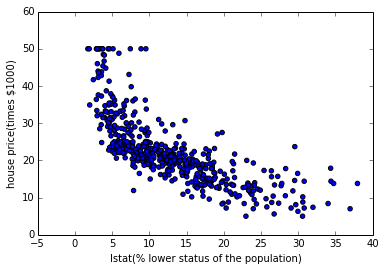

In [4]:
plt.scatter(x,y)
plt.xlabel('lstat(% lower status of the population)')
plt.ylabel('house price(times $1000)')
plt.show()

In the below code we split the data into train and test set. Here we choose 30% of data as test data.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(354, 1)
(354, 1)
(152, 1)
(152, 1)


# Linear Regression

In the below code we perform linear regression on the training data.
We plot the output of the trained model on the same graph to visualize it.

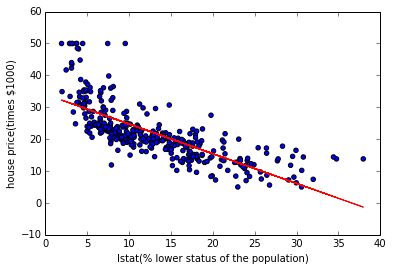

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

plt.scatter(x_train,y_train)
plt.plot(x_train,regr.predict(x_train),color = 'r')
plt.xlabel('lstat(% lower status of the population)')
plt.ylabel('house price(times $1000)')
plt.show()

As seen above the point are away from the line that is the error. 
We calculate the mean squared error for the above trained model.


In [7]:
np.mean((regr.predict(x_test) - y_test) ** 2)

47.496646586619896

# Polynomial Regression

One of the reason for error in linear regression is due to the model being a straight line. If the include the square term of the parameter LSTAT(i.e. increase the order of the model), the model becomes more fitting to the data. Ofcourse errors are present but it is minimized as compared to above model.

We are basically adding another column in the training data with the square of the 1st column then we perform regression of this training set similar as above.

We can go on adding such powers like cube and 4th power and so on, but at one point it will completely lose the generality and give 0 error i.e. it will pass through every point and this condition is called overfitting as the model will only memorize everything.

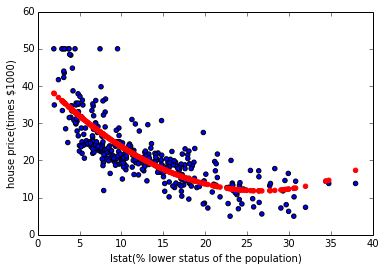

In [8]:
x_train_square = x_train **2
x_train2 = np.hstack((x_train, x_train_square))

regr = linear_model.LinearRegression()
regr.fit(x_train2, y_train)

plt.scatter(x_train,y_train)
plt.scatter(x_train,regr.predict(x_train2),color = 'r')
plt.xlabel('lstat(% lower status of the population)')
plt.ylabel('house price(times $1000)')
plt.show()

In [9]:
x_test2 = np.hstack((x_test, x_test **2))
np.mean((regr.predict(x_test2) - y_test) ** 2)

37.117766527516508

# Conclusion
We can increase the order of our regression model to better fit the data, but we cant do this limitlessly. Therefore, Polynomial Regression is better than Linear Regression in some cases.

We can use many more parameters rather than just one to determine the house price. Thats called Multivariate Regression. You can think of it as polynomial regression itself but instead of square terms it will have other features.